<a href="https://colab.research.google.com/github/fboldt/aulasml/blob/master/aula09c_kmeans_elbow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data[:,2:4]
y = data.target

In [97]:
from sklearn.cluster import KMeans

kmeans_k3 = KMeans(n_clusters=3).fit(X)
kmeans_k8 = KMeans(n_clusters=8).fit(X)
print(f"kmeans_k3: {kmeans_k3.inertia_}")
print(f"kmeans_k8: {kmeans_k8.inertia_}")

kmeans_k3: 31.371358974358966
kmeans_k8: 8.775636452241711


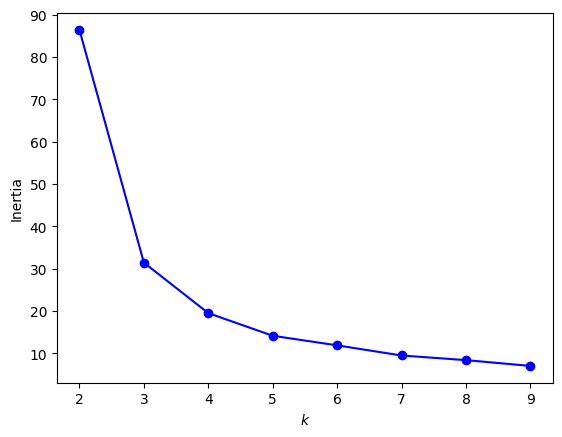

In [107]:
kmeans_per_k = [KMeans(n_clusters=k).fit(X) for k in range(2,10)]

inertias = [model.inertia_ for model in kmeans_per_k]

import matplotlib.pyplot as plt
plt.plot(range(2,10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.show()


In [127]:
def plot_elbow(X, max_k=10):
  kmeans_per_k = [KMeans(n_clusters=k).fit(X) for k in range(2,max_k)]

  inertias = [model.inertia_ for model in kmeans_per_k]

  import matplotlib.pyplot as plt
  plt.plot(range(2,max_k), inertias, "bo-")
  plt.xlabel("$k$")
  plt.ylabel("Inertia")
  plt.show()

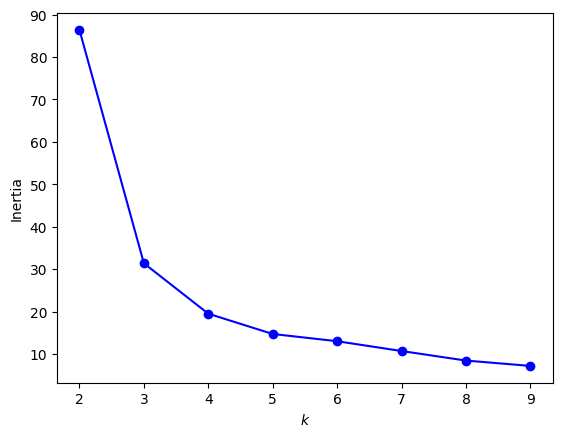

In [128]:
data = load_iris()
X = data.data[:,2:4]
y = data.target
plot_elbow(X)

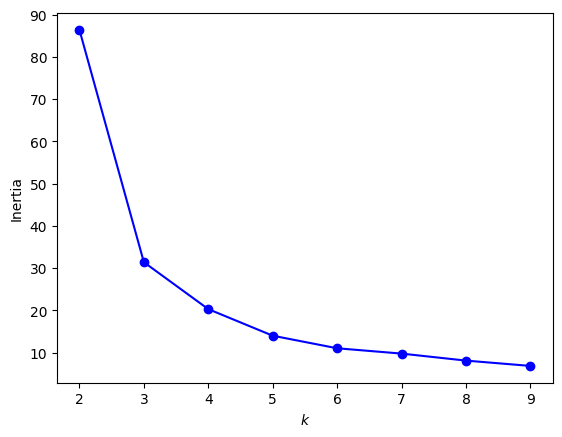

In [129]:
data = load_iris()
X = data.data[:,2:4]
y = data.target
plot_elbow(X)

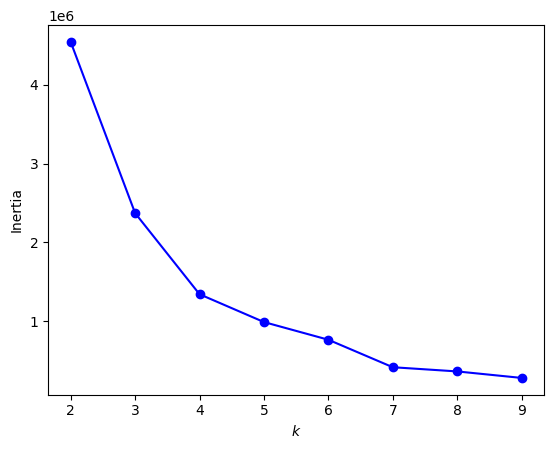

In [130]:
from sklearn.datasets import load_wine
X, y = load_wine(return_X_y=True)
plot_elbow(X)

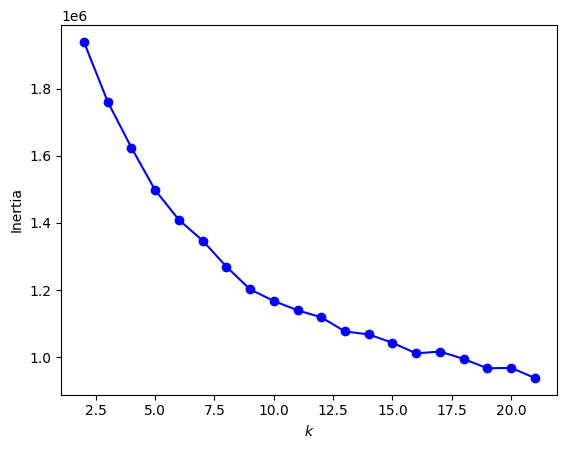

In [137]:
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)
plot_elbow(X, 22)

In [139]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import cross_validate

model = RidgeClassifier()
scores = cross_validate(model, X, y, cv=5)
print(scores["test_score"])
print(scores["test_score"].mean())

[0.92777778 0.83888889 0.90529248 0.92200557 0.84679666]
0.8881522748375115


In [160]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(KMeans(n_clusters=50), RidgeClassifier())
scores = cross_validate(model, X, y, cv=5)
print(scores["test_score"])
print(scores["test_score"].mean())

[0.96111111 0.88888889 0.96657382 0.96935933 0.89415042]
0.9360167130919221


In [150]:
!pip install optuna -qq

In [152]:
import optuna
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import cross_validate
from sklearn.datasets import load_digits

# Load the dataset
X, y = load_digits(return_X_y=True)

def objective(trial):
    # Suggest a value for n_clusters
    n_clusters = trial.suggest_int('n_clusters', 10, 200)

    # Create the pipeline
    model = make_pipeline(KMeans(n_clusters=n_clusters, n_init=10, random_state=42), RidgeClassifier()) # Added n_init and random_state for reproducibility

    # Evaluate the model using cross-validation
    scores = cross_validate(model, X, y, cv=5)

    # Return the mean test score (we want to maximize this)
    return scores["test_score"].mean()

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# Print the best parameters and best score
print("Best parameters:", study.best_params)
print("Best score:", study.best_value)

[I 2025-10-09 00:37:45,029] A new study created in memory with name: no-name-ac702bd6-7d4c-4758-8dcc-b5e432ca5694
[I 2025-10-09 00:37:52,669] Trial 0 finished with value: 0.9604998452491488 and parameters: {'n_clusters': 150}. Best is trial 0 with value: 0.9604998452491488.
[I 2025-10-09 00:37:58,292] Trial 1 finished with value: 0.9599411946765708 and parameters: {'n_clusters': 160}. Best is trial 0 with value: 0.9604998452491488.
[I 2025-10-09 00:38:06,639] Trial 2 finished with value: 0.9621711544413494 and parameters: {'n_clusters': 175}. Best is trial 2 with value: 0.9621711544413494.
[I 2025-10-09 00:38:08,260] Trial 3 finished with value: 0.9365738161559889 and parameters: {'n_clusters': 50}. Best is trial 2 with value: 0.9621711544413494.
[I 2025-10-09 00:38:15,142] Trial 4 finished with value: 0.9621680594243267 and parameters: {'n_clusters': 140}. Best is trial 2 with value: 0.9621711544413494.
[I 2025-10-09 00:38:18,874] Trial 5 finished with value: 0.9588238935314145 and pa

Best parameters: {'n_clusters': 176}
Best score: 0.9627282575054161


In [154]:
model = make_pipeline(KMeans(n_clusters=176), RidgeClassifier())
scores = cross_validate(model, X, y, cv=5)
print(scores["test_score"])
print(scores["test_score"].mean())

[0.96666667 0.94166667 0.96935933 0.98885794 0.95264624]
0.9638393686165273


In [157]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
scores = cross_validate(model, X, y, cv=5)
print(scores["test_score"])
print(scores["test_score"].mean())

[0.93888889 0.92222222 0.96100279 0.95543175 0.93036212]
0.9415815536985453


In [158]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
scores = cross_validate(model, X, y, cv=5)
print(scores["test_score"])
print(scores["test_score"].mean())

[0.93888889 0.93333333 0.95821727 0.98607242 0.94428969]
0.9521603218817705
